# Pyber Homework
Observable Trends
1. Rural cities have the fewest rides and drivers. The average fare though does not seem to correlate to either of these data points. 
2. Suburban drivers have less rides but higher average fares.
3. Urban cities have many more rides and drivers however they have the lowest average fare of the three.


In [27]:
#import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Read csv 
pyber_data_1 = pd.read_csv("raw_data/city_data.csv")
pyber_data_2 = pd.read_csv("raw_data/ride_data.csv")

#merge together
combined_pyber_data = pd.merge(pyber_data_1, pyber_data_2, on="city")
combined_pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [29]:
#calculate ride sharing data

#average fare per city
city_group = combined_pyber_data.groupby(["city"])
average_fare = city_group["fare"].mean()

#total number of rides per city
total_rides = city_group["ride_id"].count()

#create dataframe
ride_share_df = pd.DataFrame({"Average Fare" : average_fare,
                              "Total Rides" : total_rides})

#Remove duplicates from OG datafram and keep only columns needed to get driver count per city and city type
drop_dups_df = combined_pyber_data.drop_duplicates(["city"], keep = "last")
pyber_df = drop_dups_df.set_index("city")
pyber_df = pyber_df[["driver_count","type"]]

#combine two dataframes to get all info needed
frames = [ride_share_df, pyber_df]
updated_pyber_df = pd.concat(frames, axis=1)
updated_pyber_df.head()


,Average Fare,Total Rides,driver_count,type
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Anitamouth,37.315556,9,16,Suburban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban


In [30]:
#updated_pyber_df.dtypes
updated_pyber_df["Total Rides"].max()
updated_pyber_df.count()

Average Fare    125
Total Rides     125
driver_count    125
type            125
dtype: int64

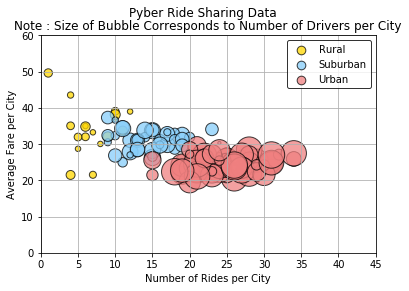

In [31]:
#create bubble plot
updated_pyber_df.sort_values("driver_count", ascending=False)

#type dfs
rural = updated_pyber_df[updated_pyber_df["type"] == "Rural"]
suburban = updated_pyber_df[updated_pyber_df["type"] == "Suburban"]
urban = updated_pyber_df[updated_pyber_df["type"] == "Urban"]

#color dictionary
#color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
color_scheme = {'Gold':'gold', 'Light Sky Blue':'lightskyblue', 'Light Coral':'lightcoral'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

#scatter plot per city type
plt.scatter(rural["Total Rides"], rural["Average Fare"], s = rural["driver_count"]*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban["Total Rides"], suburban["Average Fare"], s = suburban["driver_count"]*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban["Total Rides"], urban["Average Fare"], s = urban["driver_count"]*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#labels
plt.suptitle('Pyber Ride Sharing Data')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.xlim(0, 45)
plt.ylim(0,60)
plt.grid()

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.savefig("Pyber_Ride_Sharing.png")

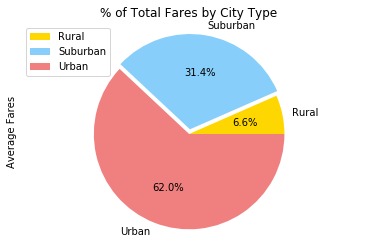

In [32]:
# % of Total Fares by City Type
type_group = combined_pyber_data.groupby(["type"])
type_fares = type_group["fare"].sum()
city_fares_df = pd.DataFrame({"Average Fares" : type_fares})
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0.05,0)

city_fares_df.plot(kind = "pie",y="Average Fares", labels=city_fares_df.index, colors=colors, explode=explode,autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.savefig("fares_by_city_type.png")

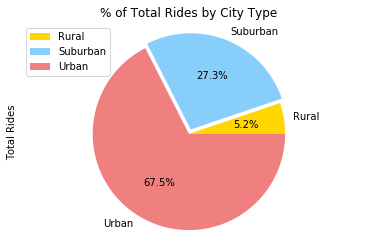

In [33]:
# % of Total rides by City Type
type_ride = type_group["ride_id"].count()
ride_df = pd.DataFrame({"Total Rides" : type_ride})
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0.05,0)

ride_df.plot(kind = "pie",y="Total Rides", labels=ride_df.index, colors=colors, explode=explode,autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("Rides_by_city_type.png")

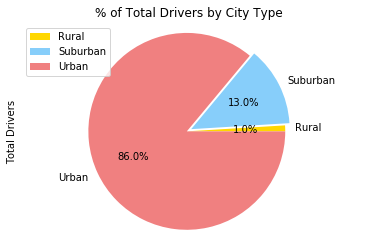

In [34]:
# % of Total Drivers by City Type
type_driver = type_group["driver_count"].sum()
driver_df = pd.DataFrame({"Total Drivers" : type_driver})
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0.05,0)

driver_df.plot(kind = "pie",y="Total Drivers", labels=driver_df.index, colors=colors, explode=explode,autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("drivers_by_city_type")